In [17]:
from functools import partial  # useful for weighted distances
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn import metrics
from scipy import stats  # to use scipy.stats.mode
from sklearn import neighbors
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tpknnsource import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                           rand_checkers, rand_clown, plot_2d, ErrorCurve,
                           frontiere_new, LOOCurve)

%matplotlib inline

import seaborn as sns
from matplotlib import rc

plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.15',
 'axes.facecolor': 'white',
 'axes.grid': False,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1.25,
 'figure.facecolor': 'white',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0.0,
 'ytick.minor.size': 0.0}

In [12]:
np.random.seed(42)  # fix seed globally

n = 100
mu = [1., 1.]
sigma = [1., 1.]
rand_gauss(n, mu, sigma)

n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
X1, y1 = rand_bi_gauss(n1, n2, mu1, mu2, sigma1, sigma2)

n1 = 50
n2 = 50
n3 = 50
mu1 = [1., 1.]
mu2 = [-1., -1.]
mu3 = [1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
sigma3 = [0.9, 0.9]
X2, y2 = rand_tri_gauss(n1, n2, n3, mu1, mu2, mu3, sigma1, sigma2, sigma3)

n1 = 50
n2 = 50
sigma1 = 1.
sigma2 = 5.
X3, y3 = rand_clown(n1, n2, sigma1, sigma2)

n1 = 150
n2 = 150
sigma = 0.1
X4, y4 = rand_checkers(n1, n2, sigma)

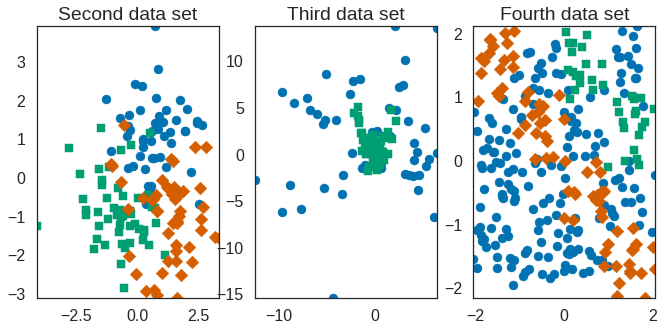

In [33]:
plt.show()
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))

plt.subplot(142)
plt.title('Second data set')
plot_2d(X2, y2)

plt.subplot(143)
plt.title('Third data set')
plot_2d(X3, y3)

plt.subplot(144)
plt.title('Fourth data set')
plot_2d(X4, y4)

In [88]:
class KNNClassifier(BaseEstimator, ClassifierMixin):
    """Home made KNN Classifier class."""

    def __init__(self, n_neighbors=1):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_ = X
        self.y_ = y
        return self
    
    def predict(self, X):
        n_samples, n_features = X.shape
        # TODO: Compute all pairwise distances between X and self.X_ using e.g.
        # metrics.pairwise.pairwise_distances
        dist = metrics.pairwise.pairwise_distances(
            X, Y=self.X_, metric='euclidean', n_jobs=1)
        # Get indices to sort them
        idx_sort = np.argsort(dist, axis=1)
        # Get indices of neighbors
        idx_neighbors = idx_sort[:, :self.n_neighbors]
        # Get labels of neighbors
        y_neighbors = self.y_[idx_neighbors]
        # Find the predicted labels y for each entry in X
        # You can use the scipy.stats.mode function
        mode,_ = stats.mode(y_neighbors, axis=1)
        # the following might be needed for dimensionaality
        y_pred = np.asarray(mode.ravel(), dtype=np.intp)
        return y_pred

In [113]:
# TODO : compare your implementation with scikit-learn

# Focus on dataset 2 for instance
X_train = X2[::2]
Y_train = y2[::2].astype(int)
X_test = X2[1::2]
Y_test = y2[1::2].astype(int)

In [105]:
knn = KNNClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
print(knn.predict(X_test))
y_pred = knn.predict(X_test)

[2 3 1 2 3 1 1 1 1 2 3 2 2 2 1 1 2 3 2 3 2 2 2 1 2 3 3 1 3 3 2 1 3 2 2 3 3
 2 2 2 1 3 2 1 2 2 1 2 3 2 3 1 2 2 1 1 1 3 1 3 3 1 1 2 3 3 2 3 3 2 3 2 1 2
 1]


In [110]:
np.allclose(y_pred, Y_pred_skl)

True

[2 2 2 3 3 1 1 3 3 1 1 1 1 2 1 2 2 3 2 3 1 3 1 2 1 1 1 1 1 2 3 2 2 2 2 3 3
 2 2 2 3 3 3 3 1 3 3 2 1 3 3 3 2 3 3 3 3 1 1 1 3 1 3 1 1 2 3 3 3 1 1 2 3 1
 2]


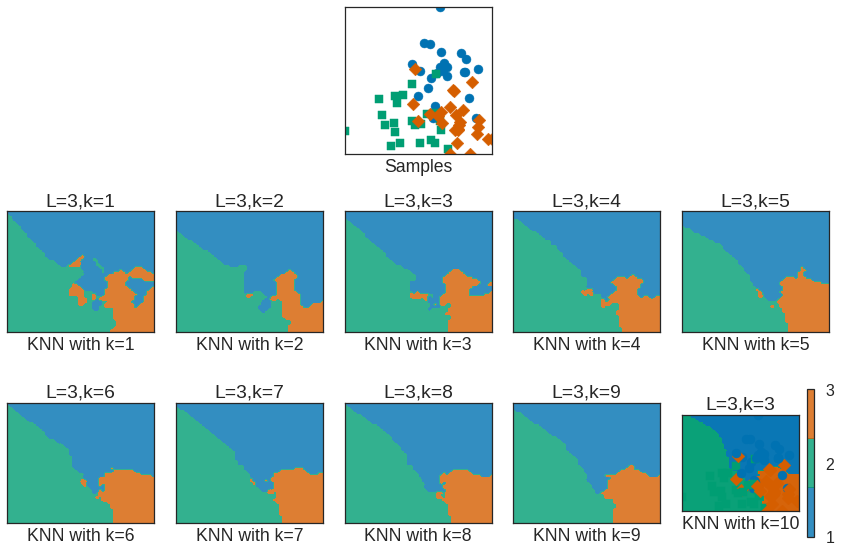

In [116]:
# Q4: Display the result when varying the value of K

plt.figure(3, figsize=(12, 8))
plt.subplot(3, 5, 3)
plot_2d(X_train, Y_train)
plt.xlabel('Samples')
ax = plt.gca()
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])

for n_neighbors in range(1, 11):
    # TODO : fit the knn
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, Y_train)
    plt.subplot(3, 5, 5 + n_neighbors)
    plt.xlabel('KNN with k=%d' % n_neighbors)

    def f(xx):
        """Classifier: needed to avoid warning due to shape issues."""
        return knn.predict(xx.reshape(1, -1))

    n_labels = np.unique(y).shape[0]
    frontiere_new(f, X, y, w=None, step=50, alpha_choice=1, n_labels=n_labels,
                  colorbar=False, samples=False, n_neighbors=n_neighbors)
    plt.draw()  # update plot

plt.tight_layout()


def f(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return knn.predict(xx.reshape(1, -1))


frontiere_new(f, X_train, Y_train, w=None, step=50, alpha_choice=1)

print(knn.predict(X_train))

In [109]:
from sklearn.neighbors import KNeighborsClassifier
neigh2 = KNeighborsClassifier(n_neighbors=1)
neigh2.fit(X_train, Y_train) 
print(neigh2.predict(X_test))
print(neigh2.predict_proba(X_test))
Y_pred_skl = neigh2.predict(X_test)

[2 3 1 2 3 1 1 1 1 2 3 2 2 2 1 1 2 3 2 3 2 2 2 1 2 3 3 1 3 3 2 1 3 2 2 3 3
 2 2 2 1 3 2 1 2 2 1 2 3 2 3 1 2 2 1 1 1 3 1 3 3 1 1 2 3 3 2 3 3 2 3 2 1 2
 1]
[[ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1. 

In [41]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X_train)
distances, indices = nbrs.kneighbors(X_train)
nbrs.kneighbors_graph(X_train).toarray()

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  1.]])

Automatically created module for IPython interactive environment


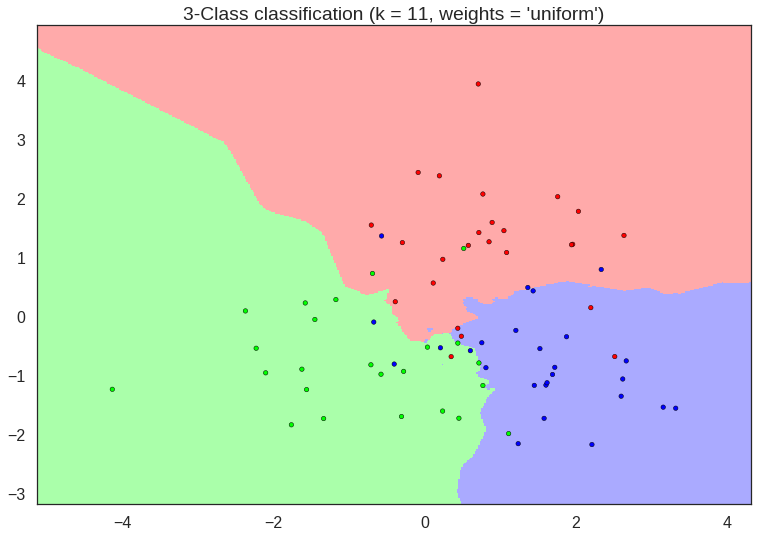

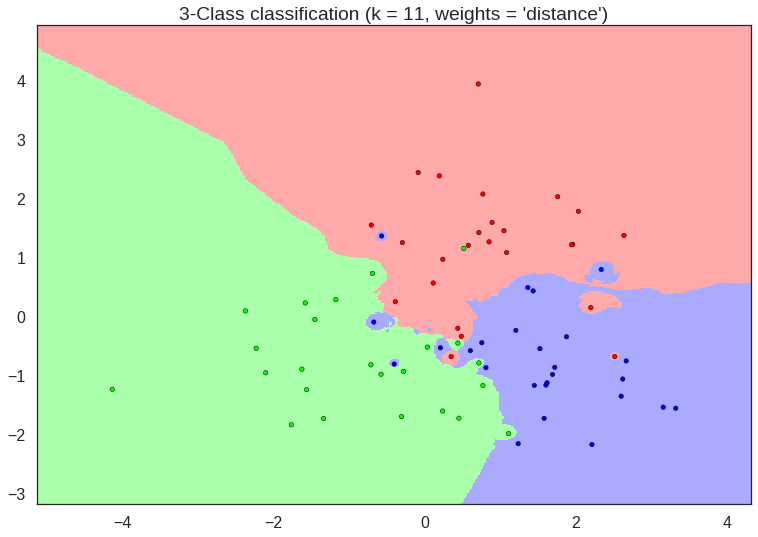

In [48]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 11


# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = X_train
y = Y_train

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [90]:
class ErrorCurve(object):
    def __init__(self, k_range=None, weights='uniform'):
        if k_range is None:
            k_range = list(range(1, 6))
        self.k_range = k_range
        self.weights = weights

    def fit_curve(self, X, y, Xtest, ytest):
        def error_func(k):
            knn = neighbors.KNeighborsClassifier(n_neighbors=k,
                                                 weights=self.weights)
            knn.fit(X, y)
            error = np.mean(knn.predict(Xtest) != ytest)
            return error

        errors = list(map(error_func, self.k_range))
        self.errors = np.array(errors)
        self.y = y

    def plot(self, marker='o', maketitle=True, **kwargs):
        plt.plot(self.k_range, self.errors, marker=marker, **kwargs)
        plt.xlabel("K")
        plt.ylabel("Test error")
        if maketitle:
            plt.title("number of training points : %d" % len(self.y))

In [95]:
ErrorCurve(y_pred)